# A model of investor sentiment

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Model setup**

The purpose of this model is to understand how a representative rational investor operates on the stock market, given a wrong idea of the true model of the assets.

_**True model of dividend earnings**_

Earnings at time $t$: $N_t = N_{t-1}+y_t\\$ 
Where $y_t$ is a random shock to earnings that can take two values, $y$ and $-y$ with equal probability


_**The mode investor believes**_

Investor believes the shocks in two consecutive periods to be correlated.\
The correlation can be negative (Mean reversion) or positive (momentum)\
The two models can be described by:

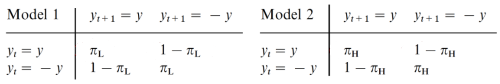

Assume $\pi_L < \frac{1}{2} < \pi_H$

Such that if investor believes in model 1, a positive shock in $y_{t+1}$ is less likely after a positive shock in $y$\
If investor believes in model 2, a positive shock in $y_{t+1}$ is more likely after a positive shock in $y$

If investor believes in model 1, he reacts too little to individual earnings announcements that creates a positive shock, as he expects a negative shock in the following period.\
Conversely, if he believes in model 2, he reacts too strongly in strings of positive shocks, as he expects the positive shocks to continue.

_Model switching_

Investor believes in two states of the world:\
$s_t = 1$: Earnings shock in $y_t$ is generated by model 1\
$s_t = 2$: Earnings shock in $y_t$ is generated by model 2\

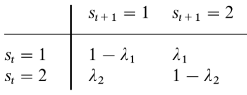

Assume $\lambda_1+\lambda_2 < 1$ (regime switch is rare)

_**Investor's earnings forecast**_

Investor observes earnings in each period and tries to understand which model is currently governing earnings.\
In the following, investor observes $y_{t+1}$ and calculates the probability $q_{t+1}$ = probability that model 1 generated the earnings.\
$q_{t+1}=P(s_{t+1}=1 | y_{t+1},y_t,q_t)$

$q_{t+1}=\frac{P(y_{t+1}|y_t,s_{t+1}=1)*P(s_{t+1}=1)}{P(y_{t+1}|y_t,s_{t+1}=1)*P(s_{t+1}=1)+P(y_{t+1}|y_t,s_{t+1}=2)*P(s_{t+1}=2)}$

Where:\
$P(s_{t+1}=1)=(1-\lambda_1)q_t + \lambda_2(1-q_t)$\
$P(s_{t+1}=2)=\lambda_1q_t + (1-\lambda_2)(1-q_t)$


_Shocks with same sign in t and t+1_\
$P(y_{t+1}=y|y_t=y,s_{t+1}=1)=P(y_{t+1}=-y|y_t=-y,s_{t+1}=1)=\pi_L$\
$P(y_{t+1}=y|y_t=y,s_{t+1}=2)=P(y_{t+1}=-y|y_t=-y,s_{t+1}=2)=\pi_H$

$q_{t+1}=\frac{\pi_L[(1-\lambda_1)q_t+\lambda_2(1-q_t)]}{\pi_L[(1-\lambda_1)q_t+\lambda_2(1-q_t)]+\pi_H[\lambda_1q_t+(1-\lambda_2)(1-q_t)]}$
\
\
\
\
_Shocks with opposite sign in t and t+1_\
$P(y_{t+1}=y|y_t=-y,s_{t+1}=1)=P(y_{t+1}=-y|y_t=y,s_{t+1}=1)=1-\pi_L$\
$P(y_{t+1}=y|y_t=-y,s_{t+1}=2)=P(y_{t+1}=-y|y_t=y,s_{t+1}=2)=1-\pi_H$

$q_{t+1}=\frac{(1-\pi_L)[(1-\lambda_1)q_t+\lambda_2(1-q_t)]}{(1-\pi_L)[(1-\lambda_1)q_t+\lambda_2(1-q_t)]+(1-\pi_H)[\lambda_1q_t+(1-\lambda_2)(1-q_t)]}$

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 